# Customer churn is when a company’s customers stop doing business with that company.
Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a
new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain
additional customers. Existing customers will often have a higher volume of service consumption and can generate
additional customer referrals.

Customer retention can be achieved with good customer service and products. 
But the most effective way for a company to prevent attrition of customers is to truly know them.
The vast volumes of data collected about customers can be used to build churn prediction models. 
Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset 
of their customer base.

In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn .metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve,f1_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')

In [3]:
# see all the rows and columns

pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [4]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Seeing the data we have to identify that out customer will exist with us  in future or not. So clearly it is a classification problem.

# Data Inspection

In [5]:
data.shape   # Total rows and columns

(7043, 21)

In [6]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


it seems most of our feature is object type including our target variable i.e churn.

In [8]:
# check for null values

data.isnull().sum()  # No null values present


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# EDA

In [9]:
data.drop('customerID',axis=1,inplace=True)

In [10]:
# lets seperate out the categorical values from the data for visualization:

categorical=[feature for feature in data.columns if data[feature].dtypes=='O']
print("No of categorical values:",len(categorical))
categorical

# Among 21 features 18 are categorical types.

No of categorical values: 17


['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']

In [11]:
# lets seperate out the numerical values from the data for visualization:

numerical=[feature for feature in data.columns if data[feature].dtypes!='O']
print("No of numerical values:",len(numerical))
numerical

# Among 21 features 18 are categorical types.

No of numerical values: 3


['SeniorCitizen', 'tenure', 'MonthlyCharges']

In [12]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

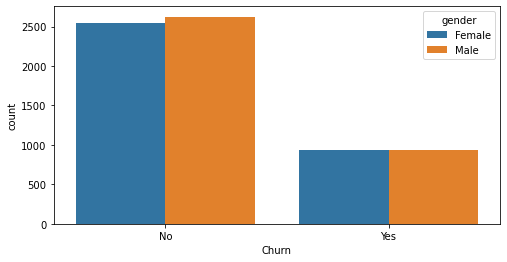

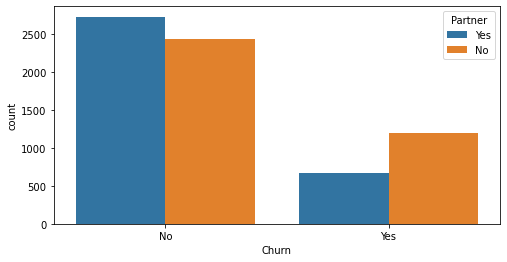

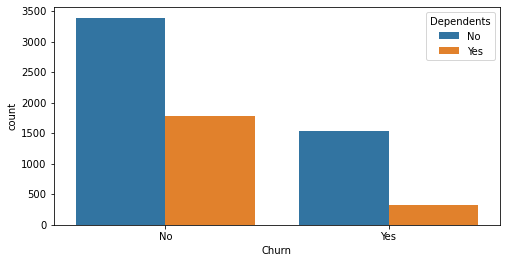

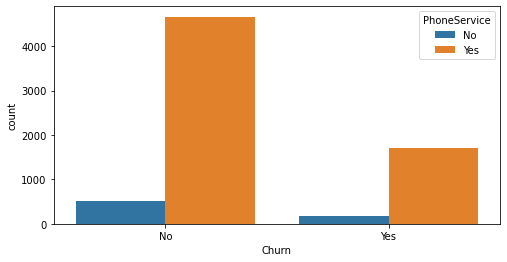

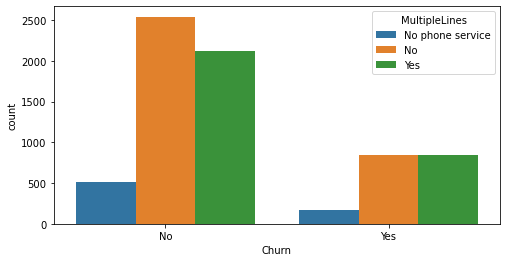

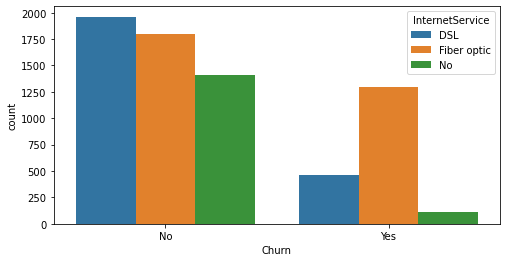

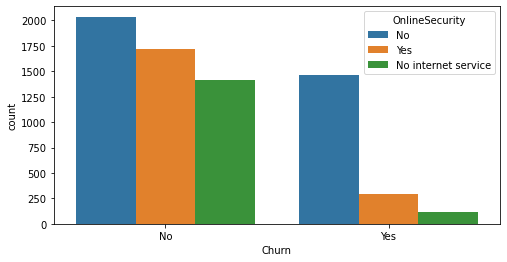

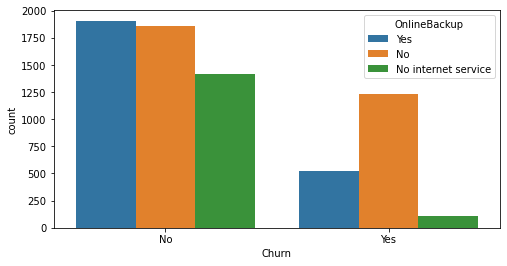

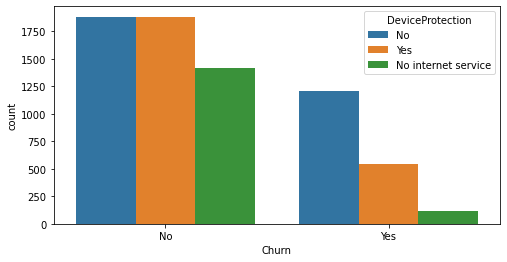

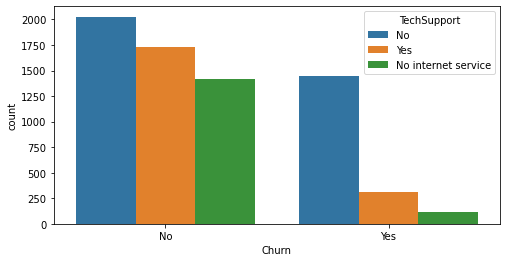

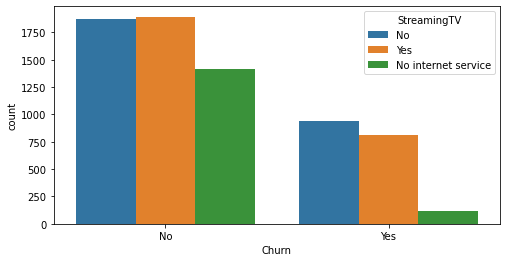

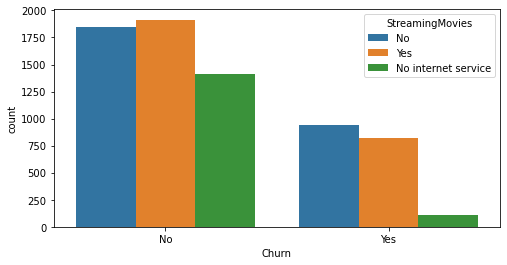

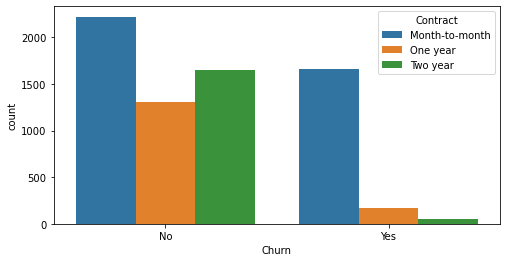

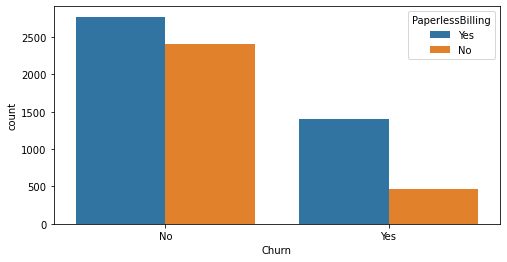

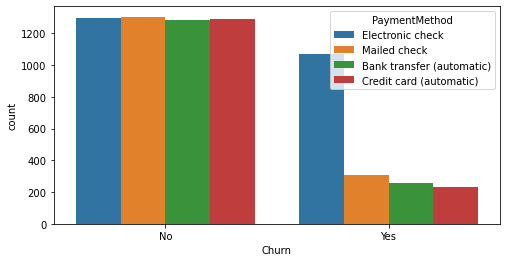

ValueError: Image size of 494x98033 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 576x288 with 1 Axes>

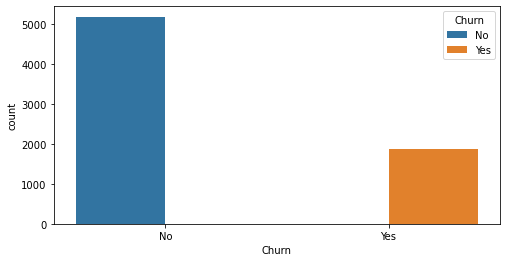

In [13]:
# we will look at how all the features is effecting the customer churn

for i in categorical:
    plt.figure(figsize=(8,4))
    sns.countplot(x='Churn',data=data,hue=i)
    plt.show()

Observation:

1. Gender is not giving much impact on the customer churn.
2. The customers those who are not partners are likely to get churn.
3. Customers those who dont have any dependents are most likely to get churned.
4. Customers with phone services are getting churned more.
5. People having one or more phone services are likely to get more options from other companies and hence are more likely    to get churn.
6. People using fibre optic services are having higher percentage of getting churned.
7. Customers get churned if the company is not providing online security that means companies need to provide more of online security to the customers.
8. Companies should increase there increase there online backup facilities.
9. Compsnies with less Device protection ,customer are more likely to churn.
10. Customers are likely to get churn if the tech support is not that strong of that company.
11. Companies with no Streaming TV option are likely to get churned.
12. Companies with no StreamingMovies option are likely to get churned.
13. Customers get churned if companies are getting revising their contract from month to month.
14. custorms with more paperless billings are chruning.
15. If the payment method is electronic check more customers are getting churned.
 

In [14]:
numerical 

['SeniorCitizen', 'tenure', 'MonthlyCharges']

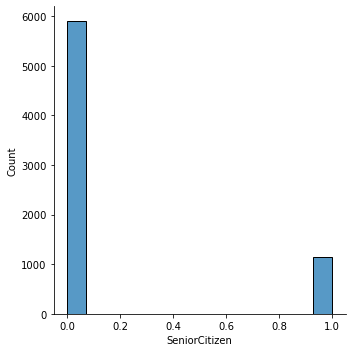

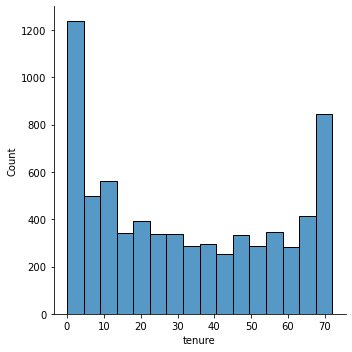

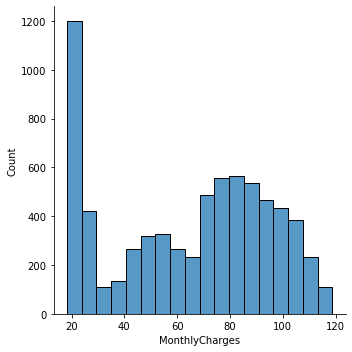

In [15]:
sns.displot(data['SeniorCitizen'])
plt.show()
sns.displot(data['tenure'])
plt.show()
sns.displot(data['MonthlyCharges'])
plt.show()

In [16]:
data.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
dtype: float64

Tenure and Monthly charges seems to be normal but senior citizen seems to be highly skewed.

<AxesSubplot:xlabel='tenure', ylabel='Count'>

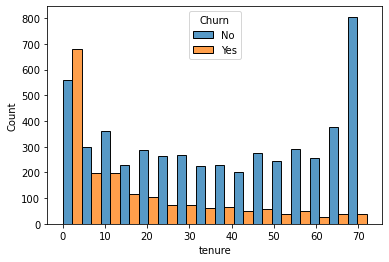

In [17]:
# Compare the numerical varibles in respect to Churn

sns.histplot(x='tenure',hue='Churn',data=data,multiple='dodge')

The churn amount is higher in the initial 5 months as per the graph during which time the customers keep trying different services.


<AxesSubplot:xlabel='MonthlyCharges', ylabel='Count'>

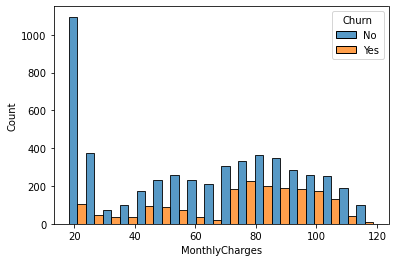

In [18]:
sns.histplot(x='MonthlyCharges',hue='Churn',data=data,multiple='dodge')

As per the plot customers giving monthly charges of less than 100 are getting churned whereas those having more that 200 are less likely to get churned.

<AxesSubplot:xlabel='SeniorCitizen', ylabel='Count'>

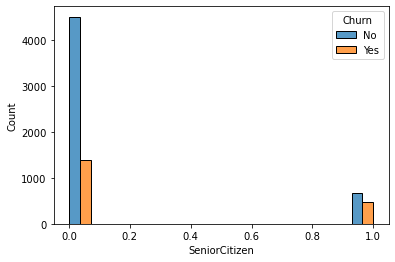

In [19]:
sns.histplot(x='SeniorCitizen',hue='Churn',data=data,multiple='dodge')

In [20]:
for feature in categorical:
    count=data[feature].value_counts()
    print('Feature Name:',feature,'--------------',count)

Feature Name: gender -------------- Male      3555
Female    3488
Name: gender, dtype: int64
Feature Name: Partner -------------- No     3641
Yes    3402
Name: Partner, dtype: int64
Feature Name: Dependents -------------- No     4933
Yes    2110
Name: Dependents, dtype: int64
Feature Name: PhoneService -------------- Yes    6361
No      682
Name: PhoneService, dtype: int64
Feature Name: MultipleLines -------------- No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
Feature Name: InternetService -------------- Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
Feature Name: OnlineSecurity -------------- No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
Feature Name: OnlineBackup -------------- No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
Feature N

In [21]:
# As most of the feature seems to be object type we need it to change into numerical values. 
# But some features are really high in number so better to control no. of feature we will be label encoding it. 

# Making use of LabelEncoding  on features like gender,Partner,Dependents,PhoneService,MultipleLines, InternetService,
#OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


In [22]:
cat=['gender','Partner','Dependents','PhoneService','MultipleLines', 'InternetService','OnlineSecurity','OnlineBackup',
     'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod',
     'TotalCharges','Churn']
for i in cat:
    data[i]=le.fit_transform(data[i])

In [23]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int32  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int32  
 3   Dependents        7043 non-null   int32  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int32  
 6   MultipleLines     7043 non-null   int32  
 7   InternetService   7043 non-null   int32  
 8   OnlineSecurity    7043 non-null   int32  
 9   OnlineBackup      7043 non-null   int32  
 10  DeviceProtection  7043 non-null   int32  
 11  TechSupport       7043 non-null   int32  
 12  StreamingTV       7043 non-null   int32  
 13  StreamingMovies   7043 non-null   int32  
 14  Contract          7043 non-null   int32  
 15  PaperlessBilling  7043 non-null   int32  
 16  PaymentMethod     7043 non-null   int32  


In [25]:
data.head()



,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


<AxesSubplot:>

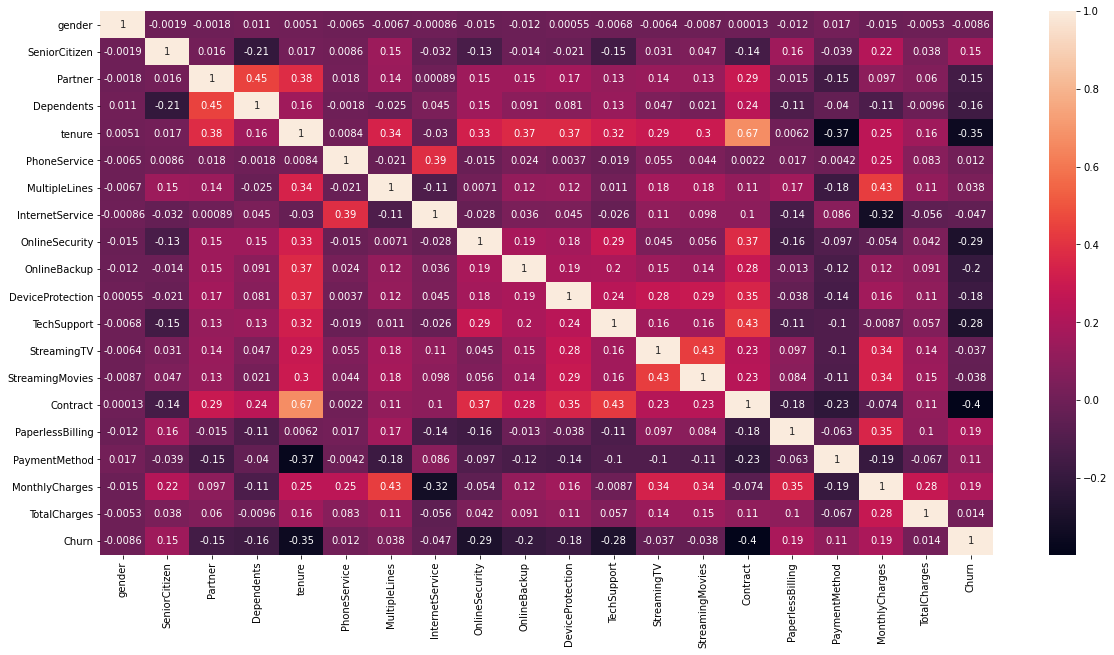

In [26]:

plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True)

# Model Building

In [27]:
# assinging the values of x and y for training and testing


x=data.drop(columns=['Churn'],axis=1)# independent variables
y=data['Churn']  # dependent Variables
print(x.shape)
print(y.shape)

(7043, 19)
(7043,)


In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)
print('X-train shape:',x_train.shape)
print('Y-train shape:',y_train.shape)
print('X-test shape:',x_test.shape)
print('Y-test shape:',y_test.shape)

X-train shape: (5634, 19)
Y-train shape: (5634,)
X-test shape: (1409, 19)
Y-test shape: (1409,)


In [29]:
sc=StandardScaler()
sc.fit_transform(x)
x=pd.DataFrame(x,columns=x.columns)

In [30]:
Logistic=LogisticRegression()
DecisionTree=DecisionTreeClassifier()
knn=KNeighborsClassifier()
RandomForest=RandomForestClassifier()


In [31]:
algo=[Logistic,DecisionTree,knn,RandomForest]
acc_models={}
for model in algo:
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    acu_score=accuracy_score(y_test,y_pred)
    print("-"*60)
    acc_models[model]=round(accuracy_score(y_test,y_pred)*100,1)
    print(f"The model {model} has:: \n\t Accuracy :: {round(accuracy_score(y_test,y_pred)*100,1)}% \n\t F1_score is :: {f1_score(y_test,y_pred)} \n\t Classification_Report is :: {classification_report(y_test,y_pred)} \n\t Confusion_matrix is :: {confusion_matrix(y_test,y_pred)}")
    print("-"*60)
    print("\n")

------------------------------------------------------------
The model LogisticRegression() has:: 
	 Accuracy :: 78.9% 
	 F1_score is :: 0.5726618705035971 
	 Classification_Report is ::               precision    recall  f1-score   support

           0       0.84      0.88      0.86      1034
           1       0.62      0.53      0.57       375

    accuracy                           0.79      1409
   macro avg       0.73      0.71      0.72      1409
weighted avg       0.78      0.79      0.78      1409
 
	 Confusion_matrix is :: [[913 121]
 [176 199]]
------------------------------------------------------------


------------------------------------------------------------
The model DecisionTreeClassifier() has:: 
	 Accuracy :: 70.2% 
	 F1_score is :: 0.45595854922279794 
	 Classification_Report is ::               precision    recall  f1-score   support

           0       0.80      0.79      0.79      1034
           1       0.44      0.47      0.46       375

    accuracy      

In [32]:
acc_models     # Logistic Showing maximum accuracy

{LogisticRegression(): 78.9,
 DecisionTreeClassifier(): 70.2,
 KNeighborsClassifier(): 74.3,
 RandomForestClassifier(): 77.3}

In [33]:
CVmodel={}

for model in algo:
    CVscore_={}
    print(f"\n{model}")
    print("-"*25)
    print("\n")
    for i in range(2,11):
        cvS=cross_val_score(model,x,y,cv=i)
        CVscore_[i]=cvS.mean()
        print(f"Mean CV Score of model {model}:: {cvS.mean()} at k-fold::{i}\n")
    CVdata=pd.DataFrame(CVscore_,index=[""])
    CVmodel[str(model)]=CVdata.max(axis=1).tolist()


LogisticRegression()
-------------------------


Mean CV Score of model LogisticRegression():: 0.7986651761371416 at k-fold::2

Mean CV Score of model LogisticRegression():: 0.8017895064367453 at k-fold::3

Mean CV Score of model LogisticRegression():: 0.7971046441846058 at k-fold::4

Mean CV Score of model LogisticRegression():: 0.7993765726821085 at k-fold::5

Mean CV Score of model LogisticRegression():: 0.803067359328987 at k-fold::6

Mean CV Score of model LogisticRegression():: 0.7993754031351683 at k-fold::7

Mean CV Score of model LogisticRegression():: 0.79682147095243 at k-fold::8

Mean CV Score of model LogisticRegression():: 0.8010807595476046 at k-fold::9

Mean CV Score of model LogisticRegression():: 0.7978149177949709 at k-fold::10


DecisionTreeClassifier()
-------------------------


Mean CV Score of model DecisionTreeClassifier():: 0.7249750462907636 at k-fold::2

Mean CV Score of model DecisionTreeClassifier():: 0.7309400621862651 at k-fold::3

Mean CV Score of mode

In [34]:
CVmodel

{'LogisticRegression()': [0.803067359328987],
 'DecisionTreeClassifier()': [0.7353391677845424],
 'KNeighborsClassifier()': [0.7525203497743391],
 'RandomForestClassifier()': [0.7949731036394768]}

After checking for CV and KFold also logistic regression is showing maximum accracy

# Now we will be hypertuning our model in order to increase the accuracy

 Hyper Tuning the Logistic Model

In [35]:
from sklearn.model_selection import RepeatedStratifiedKFold

In [36]:
LogRg=LogisticRegression()

In [37]:
#Defining models and parameter
solver=['newton_cg','lbfgs','liblinear']
penalty=['l2']
c_values=[100,10,1.0,.1,.01]


In [38]:
# defining grid search
grid=dict(solver=solver,penalty=penalty,C=c_values)
cv=RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
grid_search=GridSearchCV(estimator=LogRg,param_grid=grid,n_jobs=-1,cv=cv,scoring='accuracy',error_score=0)
grid_result=grid_search.fit(x_train,y_train)

In [39]:
print('Best_Score:',grid_result.best_score_) 
print('Best_param:',grid_result.best_params_)

Best_Score: 0.8051094062960584
Best_param: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}


In [40]:
Y_pred_LogRf_best = grid_result.predict(x_test)

# classification Report & Confusion Matix

In [41]:
print('Logistic Regression:')
print('Accuracy score:', round(accuracy_score(y_test, Y_pred_LogRf_best) * 100, 2))
print(classification_report(y_test,Y_pred_LogRf_best))
print("Cofusion matrix:",confusion_matrix(y_test,Y_pred_LogRf_best))

Logistic Regression:
Accuracy score: 79.13
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1034
           1       0.63      0.54      0.58       375

    accuracy                           0.79      1409
   macro avg       0.73      0.71      0.72      1409
weighted avg       0.78      0.79      0.79      1409

Cofusion matrix: [[913 121]
 [173 202]]


Its decreasing the accuracy by 1%

In [42]:
# ROC curve

#It is a plot of positive rate(x-axis) versus the true positive rate(y-axis) for different threshhold

In [43]:
pred_probability=grid_result.predict_proba(x_test)[:,1]
pred_probability

array([0.03720235, 0.69506913, 0.42525392, ..., 0.61039625, 0.18885541,
       0.18019091])

In [44]:
fpr,tpr,thresholds=roc_curve(y_test,pred_probability,pos_label=True)
print(fpr)
print("\n")
print(tpr)
print("\n")
print(thresholds)

[0.         0.         0.         0.00193424 0.00193424 0.00290135
 0.00290135 0.00386847 0.00386847 0.00483559 0.00483559 0.00580271
 0.00580271 0.00676983 0.00676983 0.00773694 0.00773694 0.00870406
 0.00870406 0.0106383  0.0106383  0.01160542 0.01160542 0.01257253
 0.01257253 0.01450677 0.01450677 0.01547389 0.01547389 0.01740812
 0.01740812 0.01837524 0.01837524 0.0212766  0.0212766  0.02224371
 0.02224371 0.02321083 0.02321083 0.02417795 0.02417795 0.02514507
 0.02514507 0.02611219 0.02611219 0.0270793  0.0270793  0.02804642
 0.02804642 0.02901354 0.02901354 0.03094778 0.03094778 0.03288201
 0.03288201 0.03384913 0.03384913 0.03481625 0.03481625 0.03578337
 0.03578337 0.03868472 0.03868472 0.03965184 0.03965184 0.04061896
 0.04061896 0.04158607 0.04158607 0.04255319 0.04255319 0.04448743
 0.04448743 0.04642166 0.04642166 0.04932302 0.04932302 0.05029014
 0.05029014 0.05222437 0.05222437 0.05319149 0.05319149 0.05415861
 0.05415861 0.05609284 0.05609284 0.05705996 0.05705996 0.0580

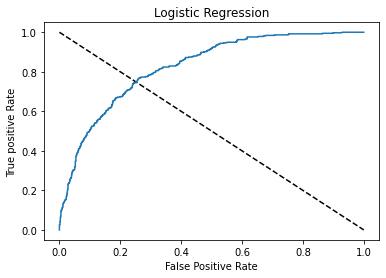

In [45]:
plt.plot([0,1],[1,0],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True positive Rate')
plt.title('Logistic Regression')
plt.show()

HyperTuning the Random forest Model

# Cross validating the Random Forest Model

In [47]:
Random=RandomForestClassifier(random_state=8)
Random.fit(x_train,y_train)
predC=Random.predict(x_test)
acu_score=accuracy_score(y_test,predC)
print("Accuracy Score:",acu_score*100)

Accuracy Score: 77.92760823278921


In [48]:
score=cross_val_score(Random,x,y,cv=100,scoring="accuracy").mean()
print('Cross_val',score*100)
print('Mean score',score.mean()*100)
print("stand_Score",score.std())

Cross_val 79.56478873239436
Mean score 79.56478873239436
stand_Score 0.0


Its decresing the accuracy by some decimal points..

# Classification Report and Confusion Matrix

In [49]:
con_matC=confusion_matrix(y_test,predC)
con_matC

array([[912, 122],
       [189, 186]], dtype=int64)

In [50]:
# ROC curve

#It is a plot of positive rate(x-axis) versus the true positive rate(y-axis) for different threshhold

In [51]:
pred_probability=Random.predict_proba(x_test)[:,1]
pred_probability

array([0.09      , 0.73      , 0.59      , ..., 0.77714286, 0.24      ,
       0.9       ])

In [52]:
fpr,tpr,thresholds=roc_curve(y_test,pred_probability,pos_label=True)
print(fpr)
print("\n")
print(tpr)
print("\n")
print(thresholds)


[0.         0.00193424 0.00193424 0.00193424 0.00193424 0.00290135
 0.00290135 0.00290135 0.00290135 0.00386847 0.00580271 0.00676983
 0.00773694 0.00870406 0.00870406 0.00870406 0.00967118 0.0106383
 0.01547389 0.01644101 0.01644101 0.02030948 0.02030948 0.02224371
 0.02611219 0.02998066 0.02998066 0.03094778 0.03191489 0.03191489
 0.03288201 0.03384913 0.04158607 0.04352031 0.04448743 0.04448743
 0.04642166 0.04642166 0.0483559  0.05802708 0.0589942  0.0589942
 0.06092843 0.06866538 0.07156673 0.07350097 0.08123791 0.08220503
 0.08220503 0.08317215 0.08800774 0.08897485 0.09381044 0.10154739
 0.10154739 0.10444874 0.10541586 0.10831721 0.11798839 0.11798839
 0.12572534 0.12572534 0.12765957 0.12765957 0.13152805 0.13926499
 0.14410058 0.14410058 0.15087041 0.15377176 0.15860735 0.15860735
 0.16731141 0.17504836 0.17601547 0.18665377 0.18762089 0.1934236
 0.20502901 0.21470019 0.2205029  0.22727273 0.23984526 0.23984526
 0.24468085 0.24468085 0.25145068 0.25241779 0.26015474 0.2698259

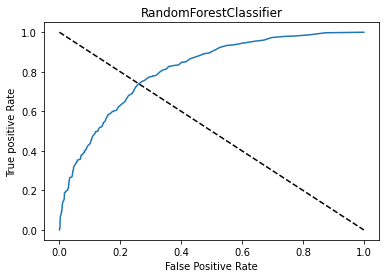

In [53]:
plt.plot([0,1],[1,0],'k--')
plt.plot(fpr,tpr,label='Random Forest Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True positive Rate')
plt.title('RandomForestClassifier')
plt.show()

In [54]:
import pickle

In [55]:
filename="Customer Churn Project"
pickle.dump(Logistic, open(filename,'wb'))

Final Observatio:

Hence we are going with Logistic Model without HyperTuning as on hypertuning my model accuracy is decreasing by 1 %.
